# Brief Introduction
Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. Though there were about 2,224 passengers and crew members, we are given data of about 1,300 passengers. Out of these 1,300 passengers details, about 900 data is used for training purpose and remaining 400 is used for test purpose. In this competition we are given about 400 test data with missing survived column and we have to use different machine learning algorithms to predict whether the passengers in the test data survived or not. Both training and test data are not clean(contains lots of missing values), so main goal of this competition is to clean the data and build the model with best accuracy.

In [1]:
import pandas as pd
train_db = pd.read_csv('train.csv')
train_db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Dictionary
Survival : 0 = No, 1 = Yes

Pclass : A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

sibsp : The # of siblings / spouses aboard the Titanic Sibling = brother, sister, stepbrother, stepsister Spouse =

husband, wife (mistresses and fiancés were ignored)

parch : The # of parents / children aboard the Titanic Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

Ticket : Ticket number

Fare : Passenger fare

Cabin : Cabin number embarked

Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

Name, Sex , Age are self-explanatory

In [2]:
test_db = pd.read_csv('test.csv')
p_id = test_db.iloc[:,0]
test_db.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


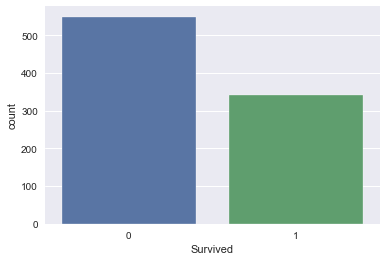

In [4]:
#Visualizing the Number of survived passenger
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('Survived', data = train_db)
plt.show()
# here we plot only for train_data as we donot have Survived column for test data,
# This plot show that around 600 people died while around 300 survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

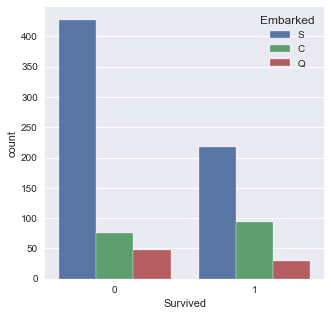

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Embarked',data=train_db)

[]

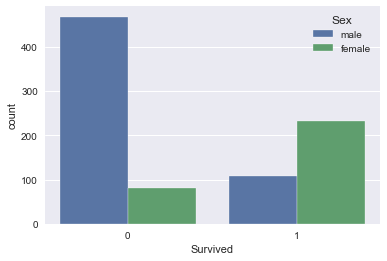

In [6]:
#visualizing whether gender affect the survival rate or not
sns.countplot('Survived', hue = 'Sex', data = train_db)
plt.plot()
# the graph clearly show that death rate for male passenger is way more than that for female

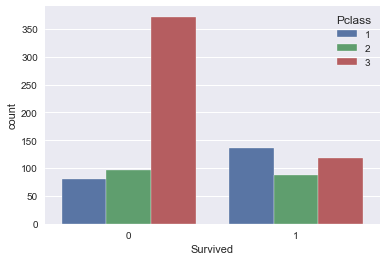

In [7]:
# visualizing whether pclass affect the survial rate or not
sns.countplot("Survived", hue = 'Pclass', data = train_db)
plt.show()
# this graph clearly show that people in third class are more likely to die 

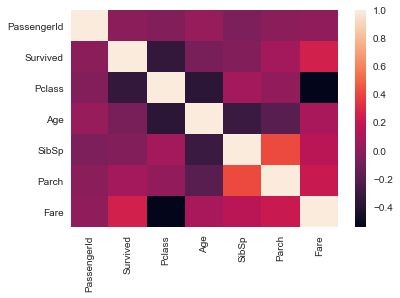

In [8]:
corr_train = train_db.corr()
sns.heatmap(corr_train)
plt.show()
# this shows that SibSp and Parch columns are related , so we can combine this two column to reduce the dimension
# of our data.. this plot only works for columns with numercal data 

In [9]:
((train_db.groupby(['Sex','Survived']).Survived.count() * 100) / train_db.groupby('Sex').Survived.count())
# this shows that female have around 74% chance of survival while male have around 81% chance of death

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

In [10]:
(train_db.groupby(['Pclass','Survived']).Survived.count() * 100) / train_db.groupby('Pclass').Survived.count()
# this shows that people belonging to third class are likely to die while people in class one are likely to survive

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

# Data Processing

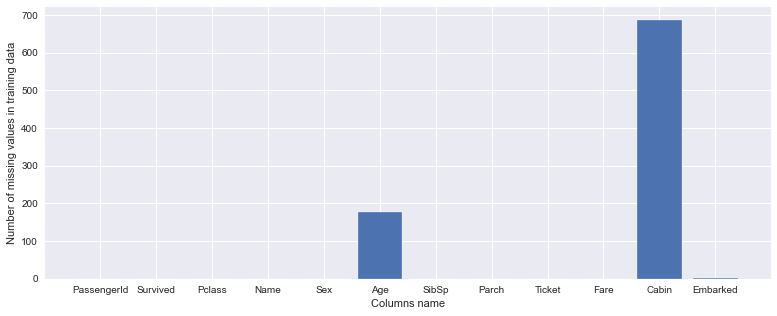

In [11]:
plt.figure(figsize = (13,5))
plt.bar(train_db.columns, train_db.isna().sum())
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in training data")
plt.show()

In [12]:
# before filling the missing values, let's drop Cabin column from both data.
train_db.drop('Cabin', axis = 1, inplace = True)
test_db.drop('Cabin', axis = 1, inplace = True)

In [13]:
combined_data = [train_db, test_db]
for data in combined_data:
    print(data.isnull().sum())
    print('*' * 20)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
********************
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64
********************


In [14]:
# we simply can use SimpleImputer class form the sklearn to deal with the missing value
import numpy as np
from sklearn.impute import SimpleImputer

impute1 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute2 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
train_db[['Age']] = impute1.fit_transform(train_db[['Age']])
test_db[['Age']] = impute2.fit_transform(test_db[['Age']])

impute3 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
test_db[['Fare']] = impute2.fit_transform(test_db[['Fare']])

train_db.Embarked.fillna('S', inplace = True)
test_db.Embarked.fillna('S', inplace = True)

In [15]:
combined_data = [train_db, test_db]
for data in combined_data:
    print(data.isnull().sum())
    print('*' * 20)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
********************
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
********************


In [16]:
train_db.Sex = train_db.Sex.map({'female':1, 'male':0})
test_db.Sex = test_db.Sex.map({'female':1, 'male':0})

In [17]:
change = {'S':1,'C':2,'Q':0}
train_db.Embarked = train_db.Embarked.map(change)
test_db.Embarked = test_db.Embarked.map(change)

# Feature Extraction
while visualizing the correlation heatmap we came to know that Sibsp and Parch columns were closely related so lets created new column called Alone using this two columns -------> 1 = Alone , 0 = not Alone

In [18]:
train_db['Alone'] = train_db.SibSp + train_db.Parch
test_db['Alone'] = test_db.SibSp + test_db.Parch

train_db.Alone = train_db.Alone.apply(lambda x: 1 if x == 0 else 0)
test_db.Alone = test_db.Alone.apply(lambda x: 1 if x == 0 else 0)

# now lets drop SibSp and Parch column for both training and testing data
train_db.drop(['SibSp','Parch'], axis = 1, inplace = True)
test_db.drop(['SibSp','Parch'], axis = 1, inplace = True )

In [19]:
columns_to_drop = ['Name','PassengerId','Ticket']
train_db.drop(columns_to_drop, axis = 1, inplace = True)
test_db.drop(columns_to_drop, axis = 1, inplace = True)

In [20]:
X_train = train_db.iloc[:,1:7]
y_train = train_db.iloc[:,0:1]
X_test = test_db
X_train

,Pclass,Sex,Age,Fare,Embarked,Alone
0,3,0,22.000000,7.2500,1,0
1,1,1,38.000000,71.2833,2,0
2,3,1,26.000000,7.9250,1,1
3,1,1,35.000000,53.1000,1,0
4,3,0,35.000000,8.0500,1,1
...,...,...,...,...,...,...
886,2,0,27.000000,13.0000,1,1
887,1,1,19.000000,30.0000,1,1
888,3,1,29.699118,23.4500,1,0
889,1,0,26.000000,30.0000,2,1


# Random Forest

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

param={'n_estimators':[100,200,300],
        'max_depth':[1,3,5,7],
        'criterion':['gini'],
        'max_features': [1,3,5],
        "min_samples_split": [2,3,5]
        }

clf=GridSearchCV(estimator=model,
                 param_grid=param,
                 scoring="accuracy",
                 verbose=1,
                 n_jobs=-1,
                 cv=5)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1, 3, 5, 7],
                         'max_features': [1, 3, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [22]:
print(clf.best_params_)
params = clf.best_params_
print('Score:', clf.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 100}
Score: 0.8372983491306257


In [24]:
from sklearn.ensemble import RandomForestClassifier
clf_RandomForest = RandomForestClassifier(n_estimators=params['n_estimators'], 
                                          criterion=params['criterion'], 
                                          max_depth=params['max_depth'], 
                                          min_samples_split=params['min_samples_split'], 
                                          max_features=params['max_features'], 
                                          random_state=42)
clf_RandomForest.fit(X_train, y_train)
predict_RandomForest = clf_RandomForest.predict(X_test)
predict_RandomForest

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
final={'PassengerId':p_id,
        'Survived':predict_RandomForest}

submission1=pd.DataFrame(data=final)
submission1.to_csv('prediction_RamdomForest.csv',index=False)

In [26]:
print('Most import features: ')
for i,j in enumerate(X_train.head(1)):
    print('%s: %s' %(j, int(clf_RandomForest.feature_importances_[i]*100)) + '%')

Most import features: 
Pclass: 15%
Sex: 43%
Age: 18%
Fare: 20%
Embarked: 2%
Alone: 1%


# Neural Network

In [27]:
combined_data = [X_test, X_train]
for dataset in combined_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [28]:
combined_data = [X_test, X_train]
for data in combined_data:
    data.loc[data['Fare'] < 30, 'Fare'] = 0
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 50),'Fare'] = 1
    data.loc[(data['Fare'] >= 50) & (data['Fare'] < 100),'Fare'] = 2
    data.loc[(data['Fare'] >= 100),'Fare'] = 3

In [29]:
X_test = X_test.astype(int)
X_test

,Pclass,Sex,Age,Fare,Embarked,Alone
0,3,0,2,0,0,1
1,3,1,2,0,1,0
2,2,0,3,0,0,1
3,3,0,1,0,1,1
4,3,1,1,0,1,0
...,...,...,...,...,...,...
413,3,0,1,0,1,1
414,1,1,2,3,2,1
415,3,0,2,0,1,1
416,3,0,1,0,1,1


In [30]:
def createNetwork():
    import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, Input

    clf = Sequential()
    clf.add(Dense(units = 32, input_dim = 6, activation = 'relu'))
    clf.add(Dense(units = 32, activation = 'relu'))
    clf.add(Dropout(0.1))
    clf.add(Dense(units = 32, activation = 'relu'))
    clf.add(Dropout(0.1))
    #clf.add(Dense(units = 256, activation = 'relu'))
    #clf.add(Dropout(0.15))
    #clf.add(Dense(units = 32, activation = 'relu'))
    clf.add(Dense(units =1 , activation = 'sigmoid'))
    
    clf.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
    
    return clf

In [31]:
model = createNetwork()
#model.summary()
model.fit(X_train, y_train, batch_size = 32, verbose = 2, epochs = 100)

Epoch 1/100
28/28 - 1s - loss: 0.6235 - accuracy: 0.6723
Epoch 2/100
28/28 - 0s - loss: 0.5248 - accuracy: 0.7654
Epoch 3/100
28/28 - 0s - loss: 0.4901 - accuracy: 0.7576
Epoch 4/100
28/28 - 0s - loss: 0.4750 - accuracy: 0.7767
Epoch 5/100
28/28 - 0s - loss: 0.4604 - accuracy: 0.7845
Epoch 6/100
28/28 - 0s - loss: 0.4588 - accuracy: 0.7924
Epoch 7/100
28/28 - 0s - loss: 0.4503 - accuracy: 0.7868
Epoch 8/100
28/28 - 0s - loss: 0.4431 - accuracy: 0.8058
Epoch 9/100
28/28 - 0s - loss: 0.4478 - accuracy: 0.7957
Epoch 10/100
28/28 - 0s - loss: 0.4455 - accuracy: 0.7991
Epoch 11/100
28/28 - 0s - loss: 0.4438 - accuracy: 0.7957
Epoch 12/100
28/28 - 0s - loss: 0.4325 - accuracy: 0.7991
Epoch 13/100
28/28 - 0s - loss: 0.4296 - accuracy: 0.8137
Epoch 14/100
28/28 - 0s - loss: 0.4307 - accuracy: 0.8002
Epoch 15/100
28/28 - 0s - loss: 0.4317 - accuracy: 0.7969
Epoch 16/100
28/28 - 0s - loss: 0.4346 - accuracy: 0.8002
Epoch 17/100
28/28 - 0s - loss: 0.4366 - accuracy: 0.8013
Epoch 18/100
28/28 - 0s

In [32]:
prediction_nn = model.predict(X_test)
#since we have use sigmoid activation function in output layer
prediction_nn = (prediction_nn > 0.5).astype(int).ravel()
print(prediction_nn)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 0 0]


In [33]:
final={'PassengerId':p_id,
       'Survived':prediction_nn}

submission2=pd.DataFrame(data=final)
submission2.to_csv('prediction_NeuralNetwork.csv',index=False)
submission2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
